In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plumed
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math

In [4]:
# Import data from the colvar files
data_hills0 = plumed.read_as_pandas("hills/HILLS.0")
data_hills1 = plumed.read_as_pandas("hills/HILLS.1")
data_hills2 = plumed.read_as_pandas("hills/HILLS.2")
data_hills3 = plumed.read_as_pandas("hills/HILLS.3")
data_hills4 = plumed.read_as_pandas("hills/HILLS.4")
data_hills5 = plumed.read_as_pandas("hills/HILLS.5")
data_hills6 = plumed.read_as_pandas("hills/HILLS.6")
data_hills7 = plumed.read_as_pandas("hills/HILLS.7")

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1743/1392044568.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  data_hills0 = plumed.read_as_pandas("hills/HILLS.0")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1743/1392044568.py:3: UserWarning: cannot load PLUMED instance, conversions will not be available
  data_hills1 = plumed.read_as_pandas("hills/HILLS.1")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1743/1392044568.py:4: UserWarning: cannot load PLUMED instance, conversions will not be available
  data_hills2 = plumed.read_as_pandas("hills/HILLS.2")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1743/1392044568.py:5: UserWarning: cannot load PLUMED instance, conversions will not be available
  data_hills3 = plumed.read_as_pandas("hills/HILLS.3")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1743/1392044568.py:6: UserWarning: cannot load PLUMED instance, conversions will not be avail

In [28]:
plt.rcParams["figure.figsize"] = (5, 5)
plt.plot(data_hills0["time"]*0.001, data_hills0["d1"], label="sim 1")
plt.plot(data_hills1["time"]*0.001, data_hills1["d1"], label="sim 2")
plt.plot(data_hills2["time"]*0.001, data_hills2["d1"], label="sim 3")
plt.plot(data_hills3["time"]*0.001, data_hills3["d1"], label="sim 4")
plt.plot(data_hills4["time"]*0.001, data_hills4["d1"], label="sim 5")
plt.plot(data_hills5["time"]*0.001, data_hills5["d1"], label="sim 6")
plt.plot(data_hills6["time"]*0.001, data_hills6["d1"], label="sim 7")
plt.plot(data_hills7["time"]*0.001, data_hills7["d1"], label="sim 8")
plt.grid()
plt.title("Metadynamics")
plt.ylabel("Distance [nm]")
plt.xlabel("Time [ns]")
plt.legend(loc="best")

NameError: name 'data_hills0' is not defined

# Reconstruct the free energy profile

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1743/3262344040.py:4: UserWarning: cannot load PLUMED instance, conversions will not be available
  fes = plumed.read_as_pandas("fes.dat")


Text(0, 0.5, 'Free energy [kJ/mol]')

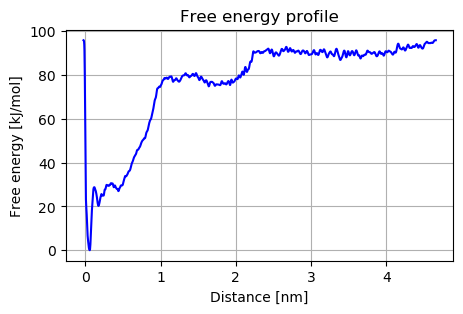

In [6]:
# cat hills/HILLS.* >> hills/all_HILLS
# plumed sum_hills --hills hills/all_HILLS --mintozero

fes = plumed.read_as_pandas("fes.dat")
plt.plot(fes["d1"], fes["file.free"], 'b')
plt.grid()
plt.title("Free energy profile")
plt.xlabel("Distance [nm]")
plt.ylabel("Free energy [kJ/mol]")

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1743/1500684936.py:1: UserWarning: cannot load PLUMED instance, conversions will not be available
  fes = plumed.read_as_pandas("fes.dat")


Text(0, 0.5, 'Free energy [kJ/mol]')

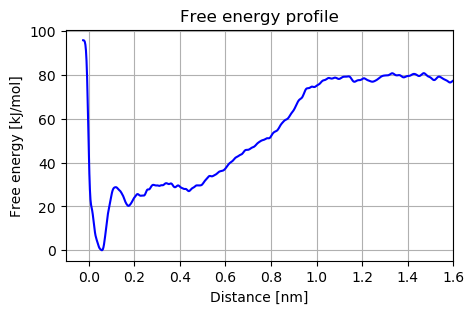

In [8]:
fes = plumed.read_as_pandas("fes.dat")
plt.plot(fes["d1"], fes["file.free"], 'b')
plt.grid()
plt.xlim([-0.1, 1.6])
plt.title("Free energy profile")
plt.xlabel("Distance [nm]")
plt.ylabel("Free energy [kJ/mol]")

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1743/3268652788.py:5: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1743/3268652788.py:5: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1743/3268652788.py:5: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1743/3268652788.py:5: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")


Text(0, 0.5, 'Free energies [kJ/mol]')

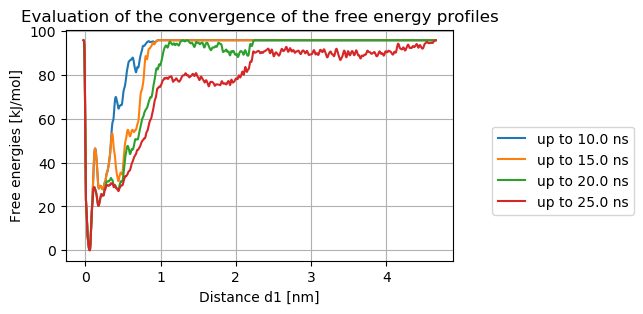

In [9]:
stride = 2000

for i in range(2, 6):   
    # import fes file into pandas dataset
    data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")
    plt.plot(data["d1"],data["file.free"], label="up to "+str(i * stride/1000 * 30/12)+" ns")

plt.grid()
plt.title("Evaluation of the convergence of the free energy profiles")
plt.legend(loc=(1.1, 0.2))
plt.xlabel("Distance d1 [nm]")
plt.ylabel("Free energies [kJ/mol]")


$$ \text{Number of simulations}\times \frac{\text{Simulated time [ps]}}{ \text{Pace of deposition [ps]}}=8\times\frac{29640}{20}=11856$$

In [31]:
plt.rcParams["figure.figsize"] = (7, 5)
img = mpimg.imread('Ca_EF2.png')
    ax.imshow(img, extent=[0.25, 0.75, 0.25, 0.75])
    ax.set_xlim([0, 4])
    ax.set_ylim([0, 120])

In [ ]:
import os
import matplotlib.animation as animation
import matplotlib.image as mpimg
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_2928/642231123.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  sub_axes = plt.axes([.45, .25, .45, .45])
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_2928/642231123.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  sub_axes = plt.axes([.45, .25, .45, .45])
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_2928/642231123.py:38: MatplotlibDep

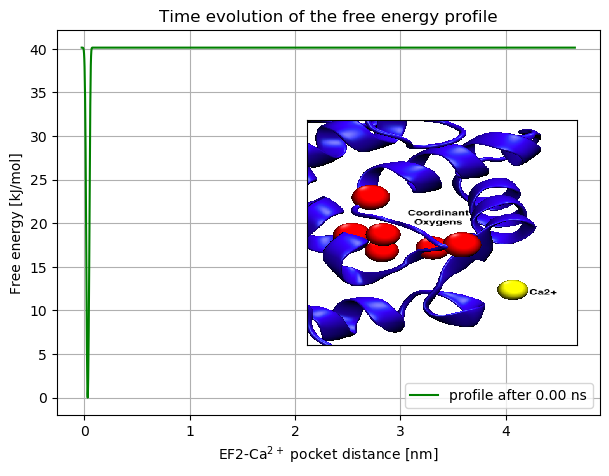

In [74]:
# Function to read data from .dat files
def read_dat_file(filename):
    with open(filename, 'r') as file:
        data = np.loadtxt(file)
    return data

# Directory containing .dat files
data_dir = "FES"

# List all .dat files in the directory
dat_files = [f"fes_{i}.dat" for i in range(119)]

# Read the image
image = mpimg.imread("Ca_EF2.png")

# Create figure and axis
fig, ax = plt.subplots()
ax2 = ax.inset_axes([0.8, 0.1, 0.15, 0.15])

# metto 2.5 = 20/8 e poi metto 0.1=1000/stride

# Function to update the plot for each frame of the animation
def update(frame):
    ax.clear()
    data = read_dat_file(os.path.join(data_dir, dat_files[frame]))
    nanosecond = '%.2f'%(frame * 0.1 * 2.5)
    ax.plot(data[:, 0], data[:, 1], 'g', label=f"profile after {nanosecond} ns")
    ax.set_title(dat_files[frame])
    ax.legend(loc="best")
    ax.set_xlabel(r"EF2-Ca$^{2+}$ pocket distance [nm]")
    ax.set_ylabel("Free energy [kJ/mol]")
    ax.set_title("Time evolution of the free energy profile")
    ax.grid()
    
    # Insert the image in a small portion of the plot
    #subplot 
    # plt.axes((left, bottom, width, height))
    sub_axes = plt.axes([.45, .25, .45, .45])  
    sub_axes.imshow(image, extent=[0.3, 0.9, 0.55, 1.05])
    # Hide the axes
    sub_axes.xaxis.set_tick_params(labelbottom=False)
    sub_axes.yaxis.set_tick_params(labelleft=False)

    # Hide X and Y axes tick marks
    sub_axes.set_xticks([])
    sub_axes.set_yticks([])   


# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(dat_files), interval=200)

writergif = animation.PillowWriter(fps=30)
ani.save('filename.gif',writer=writergif)

plt.show()
